# An analysis of several car brands over 10 years 🚗

Various car brands like Tesla, Ford, General Motors will be analyzed to get a general idea of the car market for the past 10 years.

#### Importing libraries and preparing the environment

In [2]:
import pandas_datareader.data as pdr
import numpy as np
import datetime
import yfinance as yfin
import matplotlib.pyplot as plt
yfin.pdr_override()
%matplotlib inline
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

#### Reading the stock data and plotting

In [6]:
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2023,1,1)

In [7]:
#downloading the data through Yahoo! Finance
tesla = yfin.download('TSLA', start, end)
ford = yfin.download('F',start,end)
gm = yfin.download('GM',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
#downloading the data locally as .csv file
tesla.to_csv('Tesla_Stock.csv')
ford.to_csv('Ford_Stock.csv')
gm.to_csv('GM_Stock.csv') 

In [9]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000


In [10]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,13.23,13.28,13.00,13.20,8.262148,75274700
2013-01-03,13.24,13.70,13.05,13.46,8.424885,121284700
2013-01-04,13.51,13.61,13.35,13.57,8.493736,54669900
2013-01-07,13.52,13.58,13.35,13.43,8.406108,43482400
2013-01-08,13.38,13.43,13.20,13.35,8.356036,46336200


In [11]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,29.410000,29.500000,28.629999,29.129999,22.361164,15605900
2013-01-03,29.049999,30.230000,28.840000,29.820000,22.890835,22903800
2013-01-04,29.740000,29.860001,29.230000,29.860001,22.921541,8066600
2013-01-07,29.639999,29.860001,29.299999,29.660000,22.768015,8385300
2013-01-08,29.660000,29.850000,29.049999,29.370001,22.545401,10435200


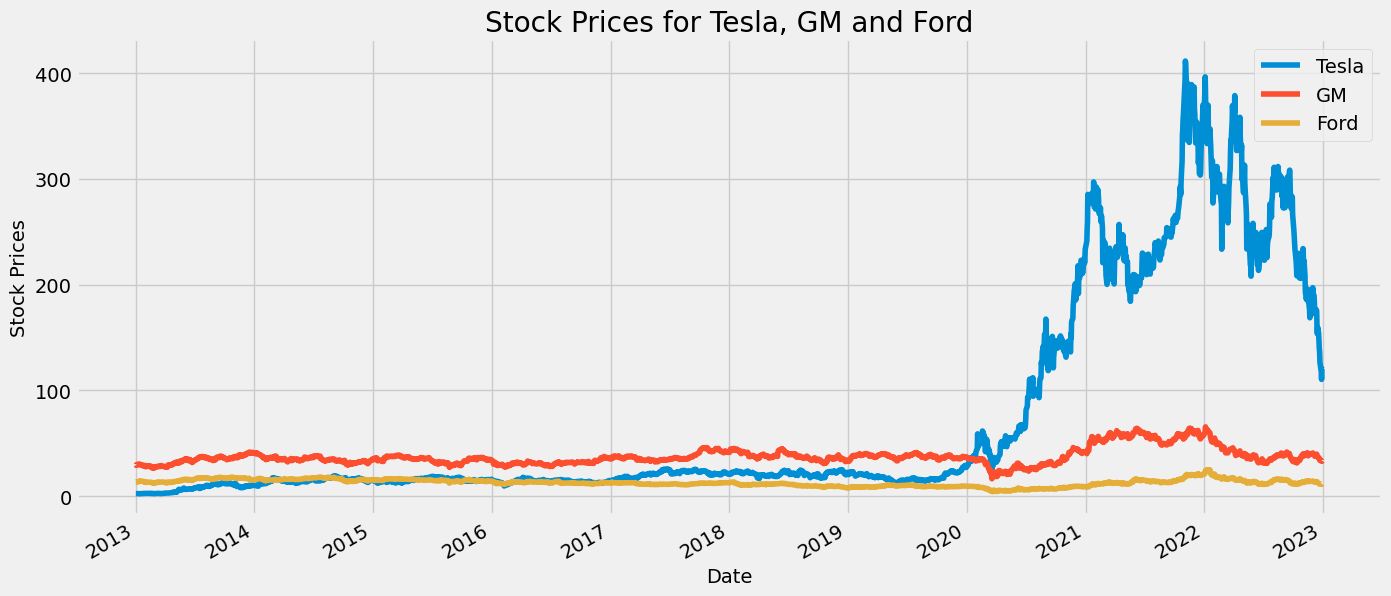

In [12]:
tesla['Open'].plot(label='Tesla',figsize=(15,7))
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')

plt.title('Stock Prices for Tesla, GM and Ford')
plt.ylabel('Stock Prices')
plt.legend()

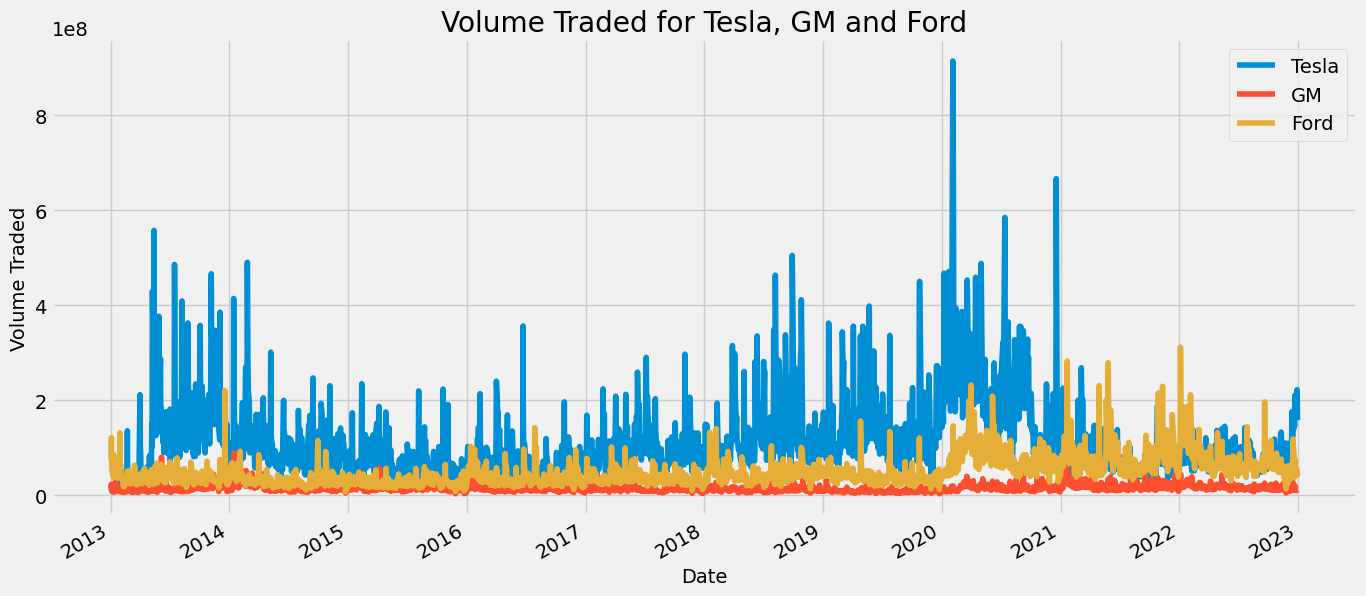

In [36]:
#volume traded comparison

tesla['Volume'].plot(label='Tesla',figsize=(15,7))
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')

plt.title('Volume Traded for Tesla, GM and Ford')
plt.ylabel('Volume Traded')
plt.legend()

In [14]:
#to check the max volume tradedd for ford
ford.iloc[[ford['Volume'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,22.52,24.559999,22.42,24.309999,22.146315,311645200


4th of January, 2022 was the date where Ford had the most volumes traded in a single day. To find a reason why, I will google this date with Ford attached to it.
https://www.reuters.com/technology/ford-doubles-lightning-production-electric-truck-battle-with-gm-heats-up-2022-01-04/

<Axes: xlabel='Date'>

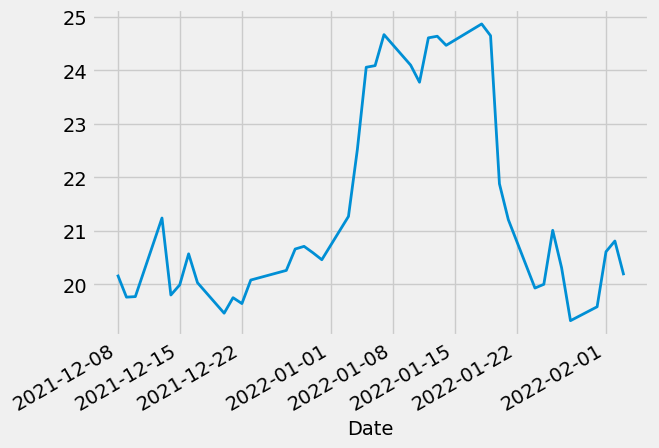

In [31]:
ford.iloc[2250:2290]['Open'].plot(lw=2)

In [37]:
#to get an idea of the market cap, total traded column is created by multiplying the open column and volume column

tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']

In [38]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000,4.181799e+07
2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000,2.610356e+07
2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000,2.345520e+07
2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000,1.538160e+07
2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000,4.429800e+07


In [39]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2013-01-02,29.410000,29.500000,28.629999,29.129999,22.361164,15605900,4.589695e+08
2013-01-03,29.049999,30.230000,28.840000,29.820000,22.890835,22903800,6.653554e+08
2013-01-04,29.740000,29.860001,29.230000,29.860001,22.921541,8066600,2.399007e+08
2013-01-07,29.639999,29.860001,29.299999,29.660000,22.768015,8385300,2.485403e+08
2013-01-08,29.660000,29.850000,29.049999,29.370001,22.545401,10435200,3.095080e+08


In [40]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2013-01-02,13.23,13.28,13.00,13.20,8.262148,75274700,9.958842e+08
2013-01-03,13.24,13.70,13.05,13.46,8.424885,121284700,1.605809e+09
2013-01-04,13.51,13.61,13.35,13.57,8.493736,54669900,7.385904e+08
2013-01-07,13.52,13.58,13.35,13.43,8.406108,43482400,5.878821e+08
2013-01-08,13.38,13.43,13.20,13.35,8.356036,46336200,6.199784e+08
